<a href="https://colab.research.google.com/github/Aldivibriani/Data-Analyst-Portfolio/blob/main/PROJECT_Analysis_of_Australian_Shopping_Cart_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT: Analysis of Australian Shopping Cart Data**

This project will Analyse Australian Shopping Cart Data. Your task are:
  1. Which products were sold the most in the last month?
  2. How have sales and revenues changed over the past few quarters?
  3. Understanding customer geogpraphic and preferences!

To answer those question, I will use four different data such as customers data, orders data, products data, and sales data.

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')

## **Loading Dataset**
first, I will load the dataset from my google drive 

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio/PROJECT: Analysis of Australian Shopping Cart Data/customers.csv')
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio/PROJECT: Analysis of Australian Shopping Cart Data/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio/PROJECT: Analysis of Australian Shopping Cart Data/products.csv')
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio/PROJECT: Analysis of Australian Shopping Cart Data/sales.csv')

In [ ]:
customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [ ]:
orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [ ]:
products.head()

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [ ]:
sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


## **Merging Data**
I will merge customers, orders, and products data to form one file because those are have the same rows.

In [ ]:
#Merging customers and orders
cust_order = pd.merge(left=customers, right=orders,
                      left_index=True, right_index=True)

#After that, merging cust_order with products to become cop_data
cop_data = pd.merge(left=cust_order, right=products,
                    left_index=True, right_index=True)

In [ ]:
cop_data.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,2021-10-08,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,2021-05-06,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,2021-03-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


## **Brief Info About Dataset**


In [ ]:
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


## Checking Missing Value

In [ ]:
cop_data.isna().sum()

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
customer_id_y    0
payment          0
order_date       0
delivery_date    0
product_ID       0
product_type     0
product_name     0
size             0
colour           0
price            0
quantity         0
description      0
dtype: int64

In [ ]:
sales.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

## Checking Categorical Variables


In [ ]:
categorical = cop_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
  print(f"{cat_col} : {cop_data[cat_col].nunique()} uniqueness variable(s)")

customer_name : 1000 uniqueness variable(s)
gender : 8 uniqueness variable(s)
home_address : 1000 uniqueness variable(s)
city : 961 uniqueness variable(s)
state : 8 uniqueness variable(s)
country : 1 uniqueness variable(s)
order_date : 291 uniqueness variable(s)
delivery_date : 305 uniqueness variable(s)
product_type : 3 uniqueness variable(s)
product_name : 28 uniqueness variable(s)
size : 5 uniqueness variable(s)
colour : 7 uniqueness variable(s)
description : 1000 uniqueness variable(s)


## Checking Discreet and Continous Variables

In [ ]:
numerical = sales.select_dtypes(["int", "float"]).columns
for num_col in numerical:
    print(f"{num_col} : {sales[num_col].nunique()} uniqueness variable(s)")

sales_id : 5000 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)


## **Convert order_date and delivery_date to Datetime**

In [ ]:
#convert those using to_datetime() function
cop_data['order_date'], cop_data['delivery_date'] = pd.to_datetime(cop_data['order_date']), pd.to_datetime(cop_data['delivery_date'])

#Checking if the types changed
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

In [ ]:
cop_data.dtypes

customer_id_x             int64
customer_name            object
gender                   object
age                       int64
home_address             object
zip_code                  int64
city                     object
state                    object
country                  object
order_id                  int64
customer_id_y             int64
payment                   int64
order_date       datetime64[ns]
delivery_date    datetime64[ns]
product_ID                int64
product_type             object
product_name             object
size                     object
colour                   object
price                     int64
quantity                  int64
description              object
dtype: object

# **Recap Dataset**
These are some point I have:

-Customers, oders, products become cop_data with:
1. there are 1000 rows and 22 columns
2. there is no missing value
3. customer_name : 1000 uniqueness variable(s)
4. gender : 8 uniqueness variable(s)
5. home_address : 1000 uniqueness variable(s)
6. city : 961 uniqueness variable(s)
7. state : 8 uniqueness variable(s)
8. country : 1 uniqueness variable(s)
9. order_date : 291 uniqueness variable(s)
10. delivery_date : 305 uniqueness variable(s)
11. product_type : 3 uniqueness variable(s)
12. product_name : 28 uniqueness variable(s)
13. size : 5 uniqueness variable(s)
14. colour : 7 uniqueness variable(s)
15. description : 1000 uniqueness variable(s)

-Sales data:
1. there are 5000 rows and 6 columns
2. there is no missing value
3. sales_id : 5000 uniqueness variable(s)
4. order_id : 993 uniqueness variable(s)
5. product_id : 1233 uniqueness variable(s)
6. price_per_unit : 23 uniqueness variable(s)
7. quantity : 3 uniqueness variable(s)
8. total_price : 69 uniqueness variable(s)
9. All the types are int64

# **Data Preparation**

## Adding Sales column to cop_data

In [ ]:
cop_data['sales'] = cop_data['price'] * cop_data['quantity']
cop_data.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358


## **Adding order_date year, month, and day to cop_data**

In [ ]:
#Adding year_order column
cop_data['year_order'] = cop_data["order_date"].dt.year

#Adding month_order column
cop_data['month_order'] = cop_data["order_date"].dt.month

#Adding day_order column
cop_data['day_order'] = cop_data["order_date"].dt.day

In [ ]:
cop_data.head()

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156,2021,10,8
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866,2021,5,6
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358,2021,3,23


## **Adding delivery_date year, month, and day to cop_data**

In [ ]:
#Adding year_delivery column
cop_data['year_delivery'] = cop_data["delivery_date"].dt.year

#Adding month_order column
cop_data['month_delivery'] = cop_data["delivery_date"].dt.month

#Adding day_order column
cop_data['day_delivery'] = cop_data["delivery_date"].dt.day

In [ ]:
cop_data

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3,2021,2,13
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,114,54,"A red coloured, M sized, Oxford Cloth Shirt",6156,2021,10,8,2021,11,3
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,114,69,"A red coloured, L sized, Oxford Cloth Shirt",7866,2021,5,6,2021,5,19
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,114,47,"A red coloured, XL sized, Oxford Cloth Shirt",5358,2021,3,23,2021,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,...,111,73,"A green coloured, XS sized, Wool Trousers",8103,2021,1,13,2021,2,2
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,...,111,43,"A green coloured, S sized, Wool Trousers",4773,2021,1,18,2021,1,31
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,...,111,41,"A green coloured, M sized, Wool Trousers",4551,2021,5,5,2021,5,21
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,...,111,42,"A green coloured, L sized, Wool Trousers",4662,2021,6,15,2021,7,12


# **Data Analysis Visualization**

## **Look for the Correlation and Among the cop_data**

In [ ]:
cop_data.corr()

,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
customer_id_x,1.000000,-0.014139,-0.005076,1.000000,-0.022171,0.021371,1.000000,-0.026326,0.028475,0.015294,NaN,0.003044,-0.006297,NaN,0.006917,-0.029787
age,-0.014139,1.000000,0.007172,-0.014139,-0.023312,0.023016,-0.014139,0.099371,0.009290,0.047032,NaN,-0.005943,0.029278,NaN,-0.000415,-0.002955
zip_code,-0.005076,0.007172,1.000000,-0.005076,0.016459,-0.010635,-0.005076,-0.026890,-0.001284,-0.010807,NaN,-0.034242,0.016040,NaN,-0.032085,-0.021526
order_id,1.000000,-0.014139,-0.005076,1.000000,-0.022171,0.021371,1.000000,-0.026326,0.028475,0.015294,NaN,0.003044,-0.006297,NaN,0.006917,-0.029787
customer_id_y,-0.022171,-0.023312,0.016459,-0.022171,1.000000,-0.018983,-0.022171,-0.026639,-0.040304,-0.047699,NaN,-0.019109,-0.025076,NaN,-0.017126,0.015662
payment,0.021371,0.023016,-0.010635,0.021371,-0.018983,1.000000,0.021371,0.035527,0.000472,0.011012,NaN,0.035346,-0.004933,NaN,0.031200,-0.009126
product_ID,1.000000,-0.014139,-0.005076,1.000000,-0.022171,0.021371,1.000000,-0.026326,0.028475,0.015294,NaN,0.003044,-0.006297,NaN,0.006917,-0.029787
price,-0.026326,0.099371,-0.026890,-0.026326,-0.026639,0.035527,-0.026326,1.000000,0.067180,0.450207,NaN,0.015518,-0.012084,NaN,0.017108,-0.021227
quantity,0.028475,0.009290,-0.001284,0.028475,-0.040304,0.000472,0.028475,0.067180,1.000000,0.918043,NaN,-0.011918,0.052903,NaN,-0.005132,-0.005756
sales,0.015294,0.047032,-0.010807,0.015294,-0.047699,0.011012,0.015294,0.450207,0.918043,1.000000,NaN,-0.001763,0.042621,NaN,0.004460,-0.012453


The correlation value is between -1 and 1. The closer the value to -1 or 1, the higher correlation. If the value is -1 or 1 that is mean perfect correlation and if 0 means no correlation.

To make it easier to read, I will use seaborn to create heatmap of cop_data

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

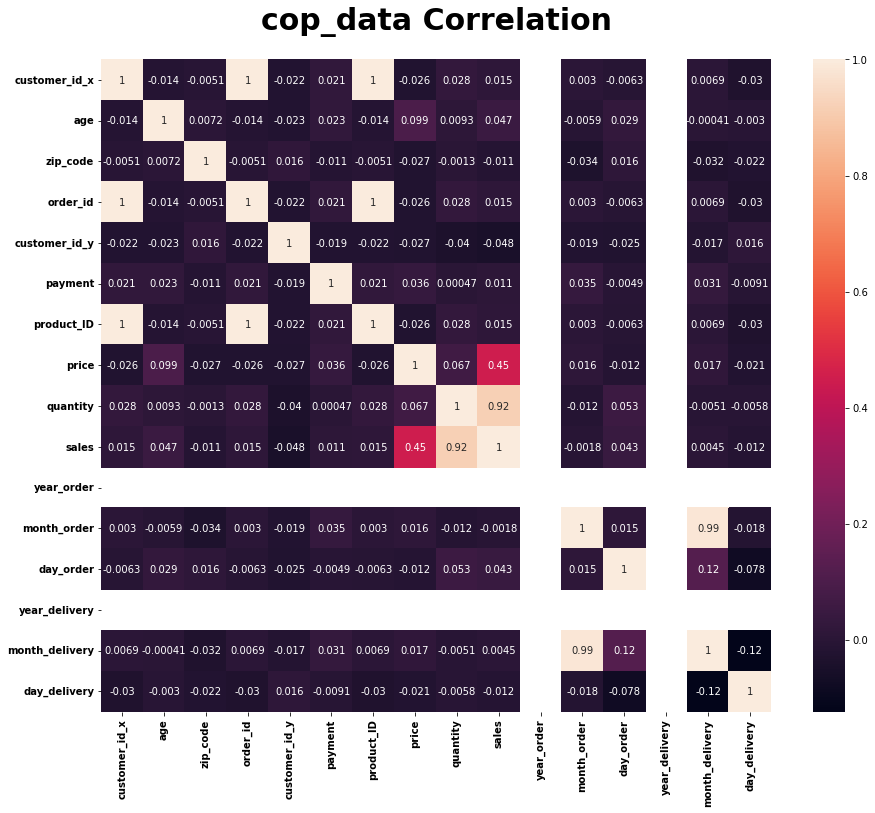

In [ ]:
#cop_data Heatmap
#sns.set_style("whitegrid")
plt.figure(figsize= (15, 12)) #figure the size
sns.heatmap(cop_data.corr(), annot=True) #create cop_data heatmap
plt.title("cop_data Correlation", weight="bold", fontsize=30, pad = 30)
plt.xticks(weight="bold", fontsize=10)
plt.yticks(weight='bold', fontsize=10)

As we can see, Sales & Price have 0.45 which can be assume as positive correlation and between Sales & Quantity have 0.92 meaning we can increase Sales by focusing on Price and especially the Quantity.



## **Look for the Correlation and Among the Sales**

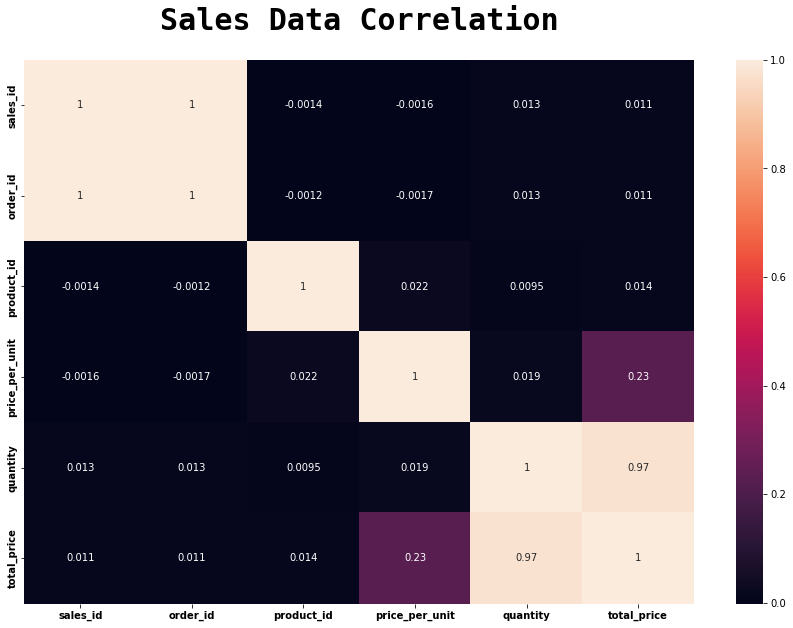

In [ ]:
# Sales Heatmap
plt.figure(figsize=(15, 10)) # figure the size
sns.heatmap(sales.corr(), annot=True) # construct the heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=10) # x-ticks
plt.yticks(weight="bold", fontsize=10); # y-ticks

From this heatmap, total_price & quantity have high positive correlation meaning if we increase the quantity, it will increase the total_price.

# **Statistical Measure**

## **The Five Number Summary of The Data**

In [ ]:
#Using .T to reverse the rows and columns cop_data
cop_data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
customer_id_x,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
age,1000.0,49.860,17.647828,20.0,34.00,50.0,65.00,80.0
zip_code,1000.0,5004.872,2884.497332,2.0,2401.75,5083.0,7460.25,9998.0
order_id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
customer_id_y,1000.0,506.640,277.115502,1.0,275.25,515.0,737.25,1000.0
payment,1000.0,33972.936,14451.609047,10043.0,21329.25,33697.5,46249.00,59910.0
product_ID,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
price,1000.0,108.095,9.158048,90.0,102.00,112.0,115.00,119.0
quantity,1000.0,60.371,11.606812,40.0,50.00,61.0,70.00,80.0
sales,1000.0,6532.937,1408.645064,3690.0,5405.00,6454.0,7656.75,9520.0


In [ ]:
sales.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
sales_id,5000.0,2499.5000,1443.520003,0.0,1249.75,2499.5,3749.25,4999.0
order_id,5000.0,503.0382,285.964418,1.0,258.00,504.5,749.00,999.0
product_id,5000.0,634.0532,363.255794,1.0,323.00,635.0,951.00,1259.0
price_per_unit,5000.0,103.5016,9.195004,90.0,95.00,102.0,112.00,119.0
quantity,5000.0,1.9924,0.807510,1.0,1.00,2.0,3.00,3.0
total_price,5000.0,206.3600,86.357457,90.0,112.00,204.0,285.00,357.0


# **Univariate Data Analysis**

In [ ]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )


#TO CREATE 2 PLOTS BELOW : Distplot & ggplot
    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

## **Sales**
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Sales Data, the  𝜇=6533  and the  𝜎=1409.
###Calculation:
*6533−2(1409)=3715*

*6533+2(1409)=9531*

i.e the mean minus 2 standard deviation and the mean plus 2 standard deviation.

###Interpretation:
At least  75%  of the Shopping Cart Database Sales customer population in Australia has sales ranging from  3715−9531  (Australian Dollars).

In [ ]:
print('Sales mean:', cop_data["sales"].mean())
print('Sales standard Deviation:', cop_data['sales'].std())

Sales mean: 6532.937
Sales standard Deviation: 1408.6450638634797


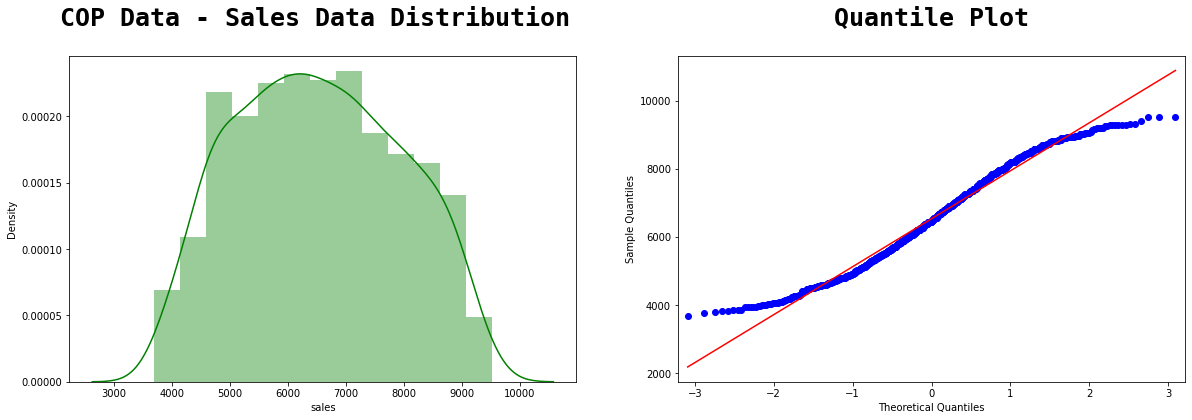

In [ ]:
#Sales Data
univariate_analysis( #call the function
    data=cop_data['sales'], #put the data
    color='green', #pick the color
    title1 = "COP Data - Sales Data Distribution ", 
    title2 = "Quantile Plot");

##**Age**
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Age Data, the  𝜇=49.8  and the  𝜎=17.6.

####Calculation:
*49.8−2(17.6)=14.59*
 
*49.8+2(17.6)=85.0* 

####Interpretation:
At least  75%  of the Shopping Cart Database customer population in Australia has an age range of  14−85  years.

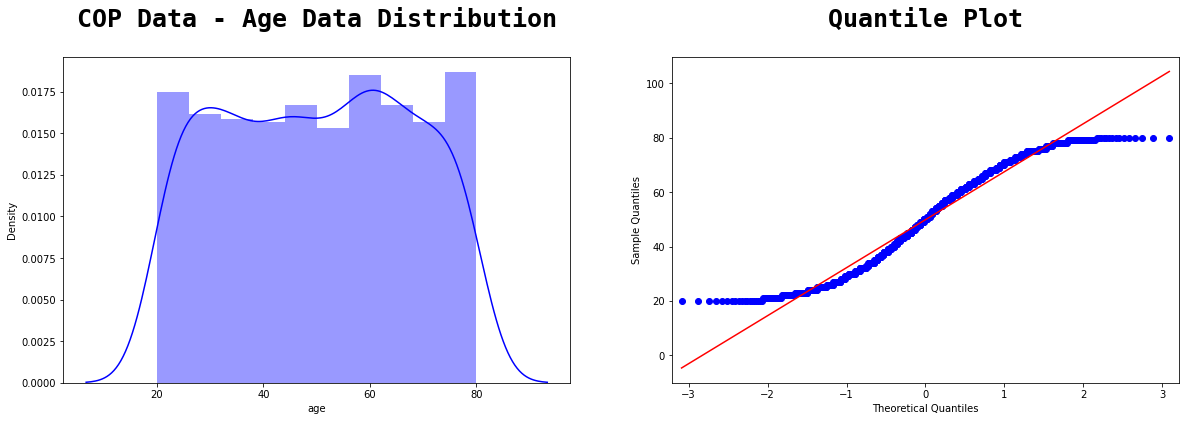

In [ ]:
# Age Data
univariate_analysis( # call the function
    data=cop_data['age'], # put the data
    color='blue', # pick the color
    title1='COP Data - Age Data Distribution', # title1
    title2='Quantile Plot'); # title2

##**Price**
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Price Data, the  𝜇=108.095  and the  𝜎=9.15.

####Calculation:
*108.095−2(9.15)=89.795* 

*108.095+2(9.15)=126.395* 

####Interpretation:
At least  75%  of Shopping Cart population in the product price database in Australia has a price range from  89,795−126,395  (Australian Dollars).

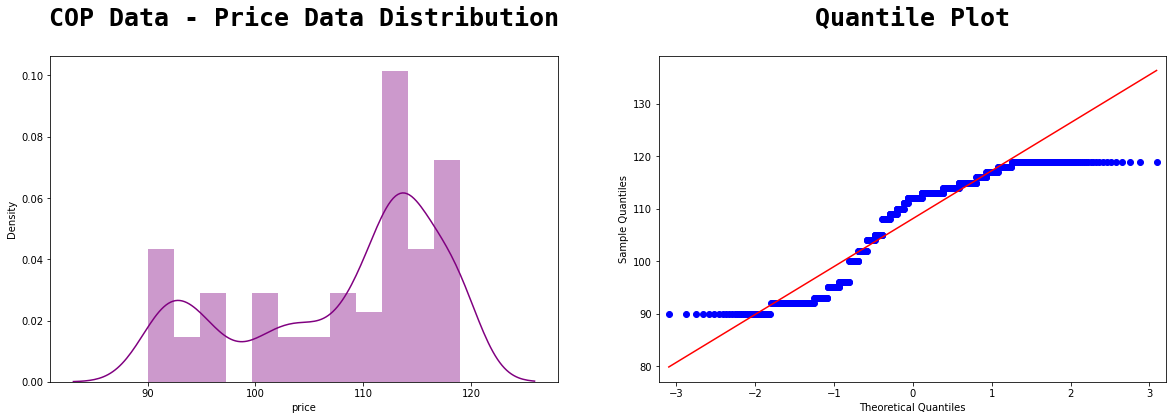

In [ ]:
# Price Data
univariate_analysis( # call the function
    data=cop_data['price'], # put the data
    color='purple', # pick the color
    title1='COP Data - Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

##**Quantity**
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Quantity Data, the  𝜇=60.3  and the  𝜎=11.6

####Calculation:
*60.3−2(11.6)=37* 

*60.3+2(11.6)=83.5* 

####Interpretation:
At least  75%  of the Shopping Cart Database Quantity ordered population in Australia has a quantity range from  37−83.5  quantity ordered.

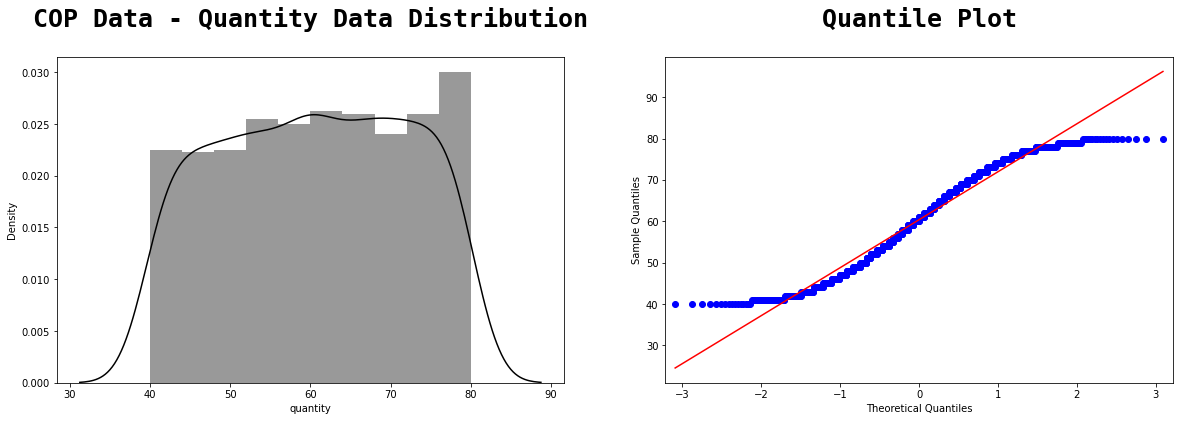

In [ ]:
# Quantity Data
univariate_analysis( # call the function
    data=cop_data['quantity'], # put the data
    color='black', # pick the color
    title1='COP Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

##**Price Per-Unit**
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Price Per Unit Data, the  𝜇=103.5  and the  𝜎=9.1

####Calculation:

*103.5−2(9.1)=85.3*

*103.5+2(9.1)=121.7*

####Interpretation:
At least  75%  of the population of the Shopping Cart Database, the per unit price range is in between  85.3 to 121.7  (Australian Dollars).

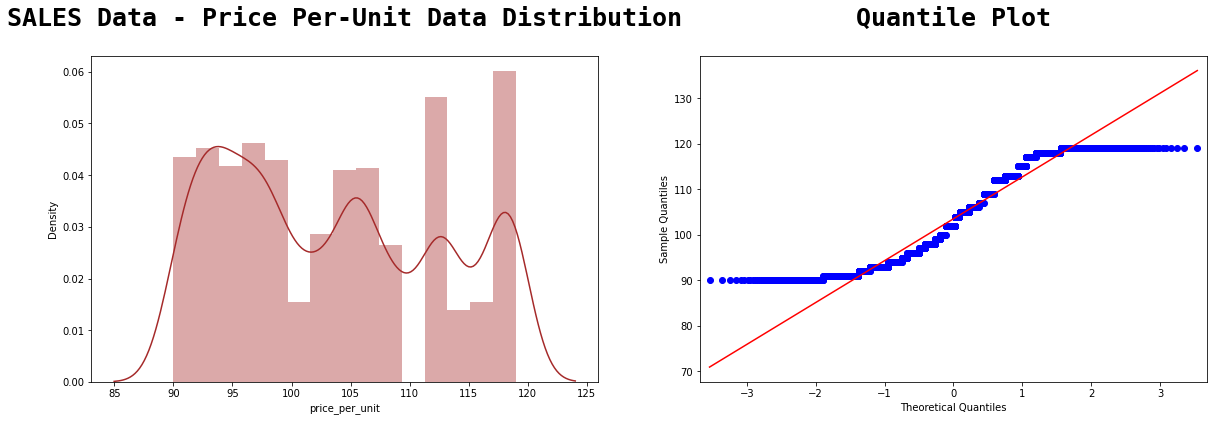

In [ ]:
# Total Price Data
univariate_analysis( # call the function
    data=sales['price_per_unit'], # put the data
    color='brown', # pick the color
    title1='SALES Data - Price Per-Unit Data Distribution', # title1
    title2='Quantile Plot'); # title2

##**Total Price**
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Total Price Data, the  𝜇=206.3  and the  𝜎=86.3

####Calculation:
*206.3−2(86.3)=33.7*

*206.3+2(86.3)=378.9 *

###Interpretation:
At least  75%  of the sales data has a total price range from  33.7 to 378.9  (Australian Dollars).

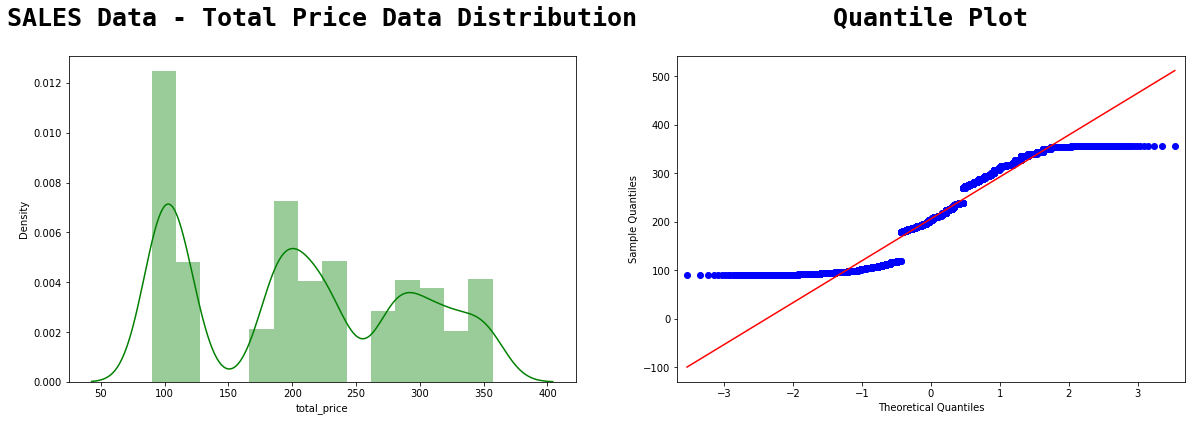

In [ ]:
# Price Data
univariate_analysis( # call the function
    data=sales['total_price'], # put the data
    color='green', # pick the color
    title1='SALES Data - Total Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

##Q**uantity**
Find the proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. and In the Quantity Data, the  𝜇=2  and the  𝜎=1 , if we round it.

#### Calculation:
*2−2(1)=0*

*2+2(1)=4*

####Interpretation:
At least  75%  of the population of Shopping Cart Database Quantity ordered in Australia has a total quantity range from  0−4  quantity ordered.

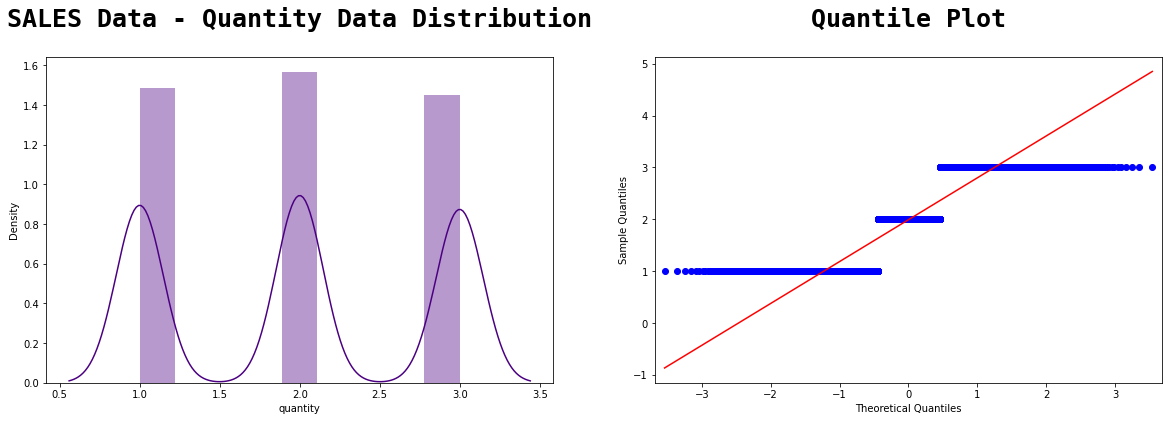

In [ ]:
# Price per-unit Data
univariate_analysis( # call the function
    data=sales['quantity'], # put the data
    color='indigo', # pick the color
    title1='SALES Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

# **Which products were sold the most in the last month?**

By grouping year_order, month_order, product_type, product_name, and sales, We can see which products were sold the most.

As from the result below, We can see that Denim is the product was sold the most with sales 63480 on April 2021. Followed with product type Jacket, Cardigan, that has 54044 sales on August 2021.

In [ ]:
(cop_data.groupby(["year_order", "month_order", "product_type", "product_name"])["sales"] # groupping
        .sum() # sum
        .astype("int") # change the type 
        .sort_values(ascending=False) # sort the values
        .to_frame() # change it into data frame
        .head(10) # look the first 10 rows
        ) # Transpose

sales
year_order month_order product_type product_name       
2021       4           Shirt        Denim         63480
           8           Jacket       Cardigan      54044
           2           Shirt        Dress         52241
           9           Trousers     Chinos        50500
           1           Jacket       Shearling     49495
           6           Shirt        Flannel       49152
           1           Shirt        Polo          47970
           9           Jacket       Leather       47573
           1           Jacket       Leather       47121
           6           Shirt        Linen         46516

In [ ]:
(cop_data.groupby(["year_order", "month_order", "product_type", "product_name"])["sales"] # groupping
        .sum() # sum
        .astype("int") # change the type 
        .sort_values(ascending=False) # sort the values
        .to_frame() # change it into data frame
        .head(10) # look the first 10 rows
        ).T # Transpose
        

year_order     2021                                                            \
month_order       4        8      2        9         1       6      1       9   
product_type  Shirt   Jacket  Shirt Trousers    Jacket   Shirt  Shirt  Jacket   
product_name  Denim Cardigan  Dress   Chinos Shearling Flannel   Polo Leather   
sales         63480    54044  52241    50500     49495   49152  47970   47573   

year_order                   
month_order        1      6  
product_type  Jacket  Shirt  
product_name Leather  Linen  
sales          47121  46516

# **How has Sales and Revenue Changed Over The Past Few Quarters**

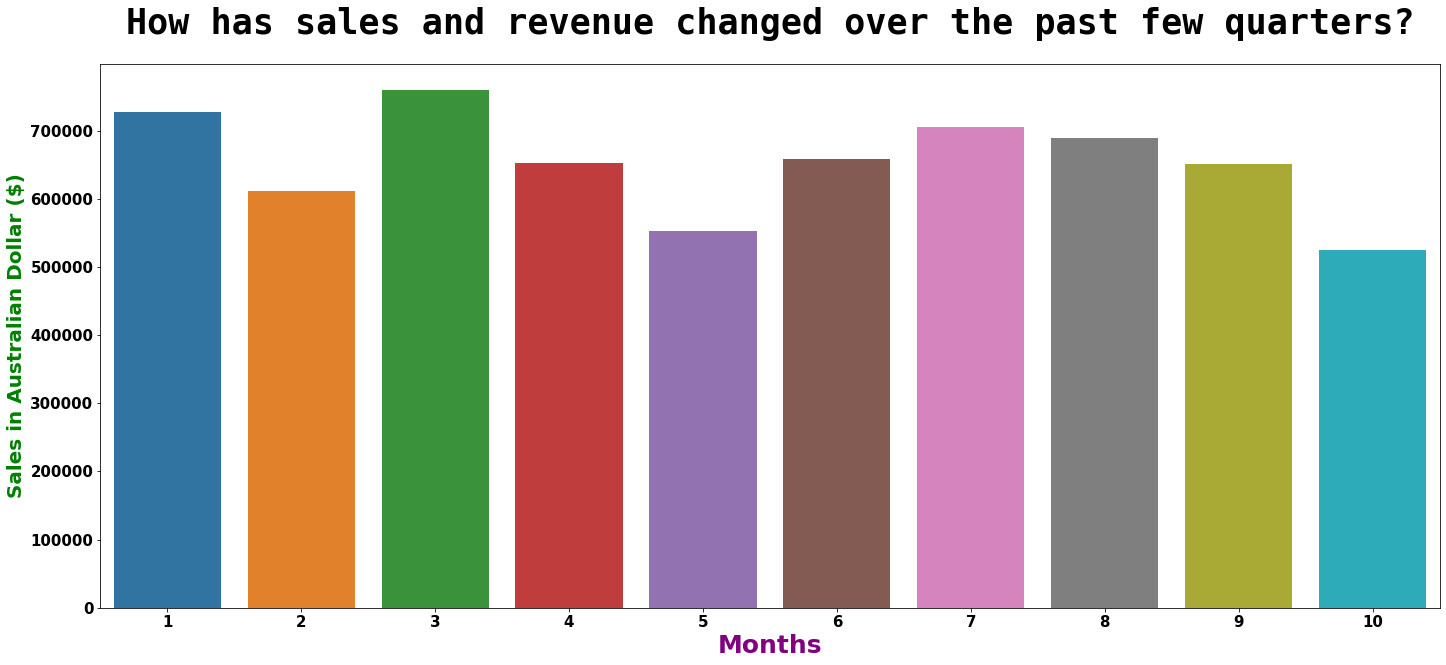

In [ ]:
# group the Month cols
sum_month_order = cop_data.groupby(["month_order"]).sum().astype("int")
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot 
sns.barplot(
    x=sum_month_order.index, # x-axis
    y=sum_month_order["sales"], # y-axis
    data=sum_month_order, # data
    # palette="deep" # palette
) 
# title 
plt.title(
    "How Has Sales and Revenue Changed Over The Past Few  Quarters", 
    fontname="monospace", # fontname
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
# x-label
plt.xlabel( # x-label
    "Months", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in Australian Dollar ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

# **Understanding Customer demographics and their preferences**

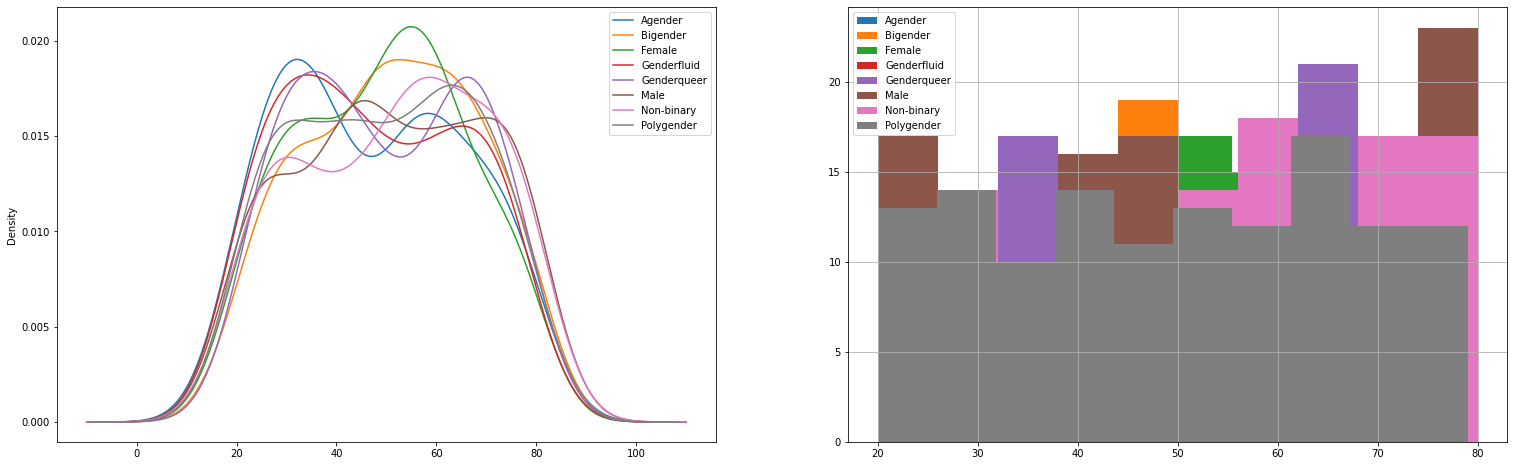

In [ ]:
plt.figure(figsize=(26, 8)) # figure the size
plt.subplot(1, 2, 1) # make a subplots for making 2 visualization 
cop_data.groupby("gender").age.plot(kind='kde',legend=True); # group gender and plot it
plt.subplot(1, 2, 2) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.hist(legend=True); # group gender and plot it using hist plot

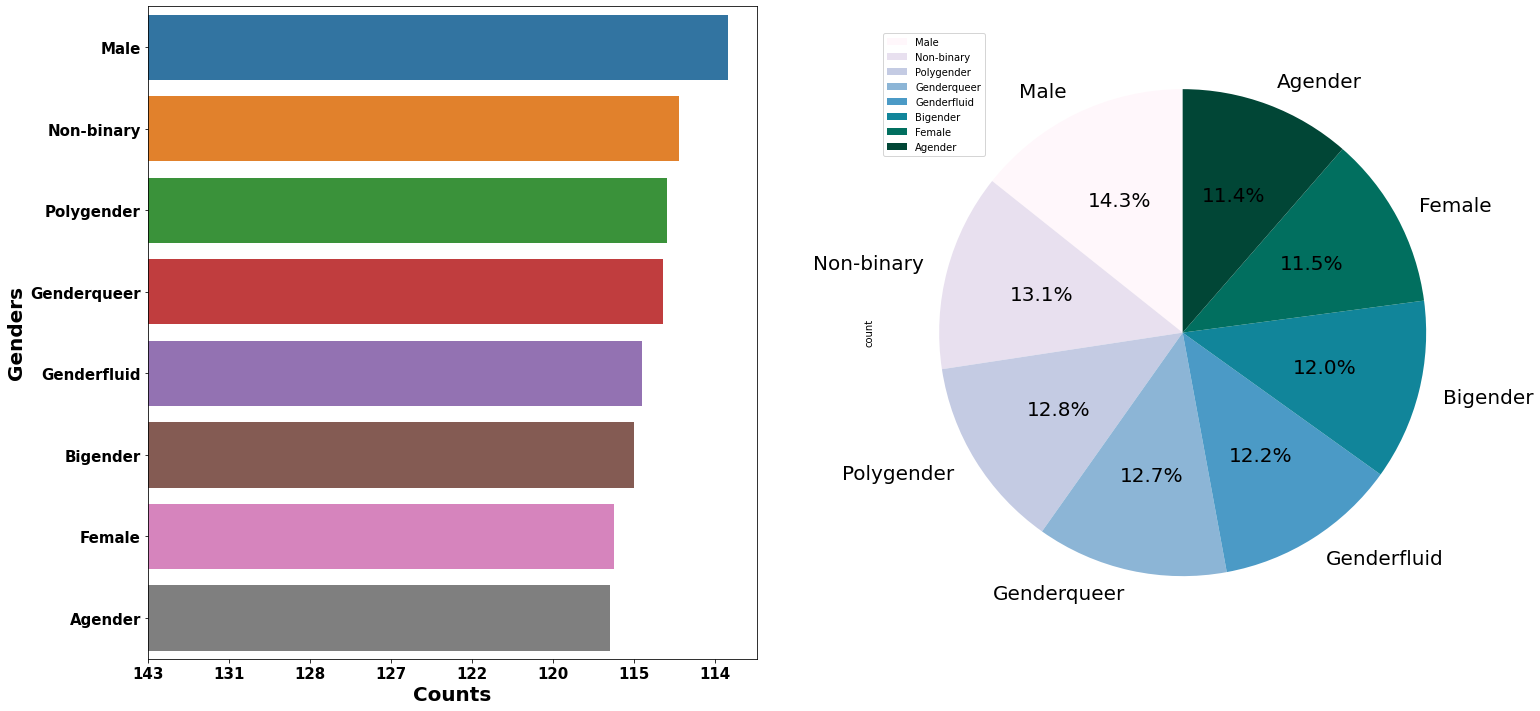

In [ ]:
fig, (ax1, ax2) = plt.subplots( # subplots
    ncols=2, # n-cols
    nrows=1, # c-rows
    figsize=(24, 12) # figuring the size
)
#Creating Bar Plot
sns.barplot( # barplot
    x=cop_data["gender"].value_counts().values, # x-axis
    y=cop_data["gender"].value_counts().index, # y-axis
    # palette="viridis", # palette
    ax=ax1 # axes
)
#Creating Pie Plots
# Prepare data for Pie Plots
cop_pie = {"gender": ["Male", "Non-binary", "Polygender", "Genderqueer", "Genderfluid", "Bigender", "Female", "Agender"], # gender
           "count": [143, 131, 128, 127, 122, 120, 115, 114]} # count
cop_pie = pd.DataFrame(cop_pie)
cop_pie.plot( # plot 
    kind="pie", # kind pie of course
    y="count", # y-axis
    labels=cop_pie["gender"], # the labels
    autopct='%1.1f%%', # pct
    startangle=90, # angle
    legend=True, # legend
    colormap=plt.cm.PuBuGn, # cmap
    fontsize=20, # fontsize
    textprops=dict(color="black"), # textprops
    ax=ax2 # axes
)
ax1.set_xlabel( # x-label
    "Counts", 
    weight="bold", # weight
    fontsize=20 # font-size
) 
ax1.set_xticklabels( # x-ticklabels
    labels=cop_pie["count"], # labels 
    weight="bold", # weight
    fontsize=15 # font-size
) 
ax1.set_ylabel( # y-label
    "Genders", 
    weight="bold", # weight
    fontsize=20 # font-size
) 
ax1.set_yticklabels( # y-ticklabels
    labels=cop_pie["gender"], # labels 
    weight="bold", # weight 
    fontsize=15 # font-size
); 

# **Area with The Higher Number of Sales**

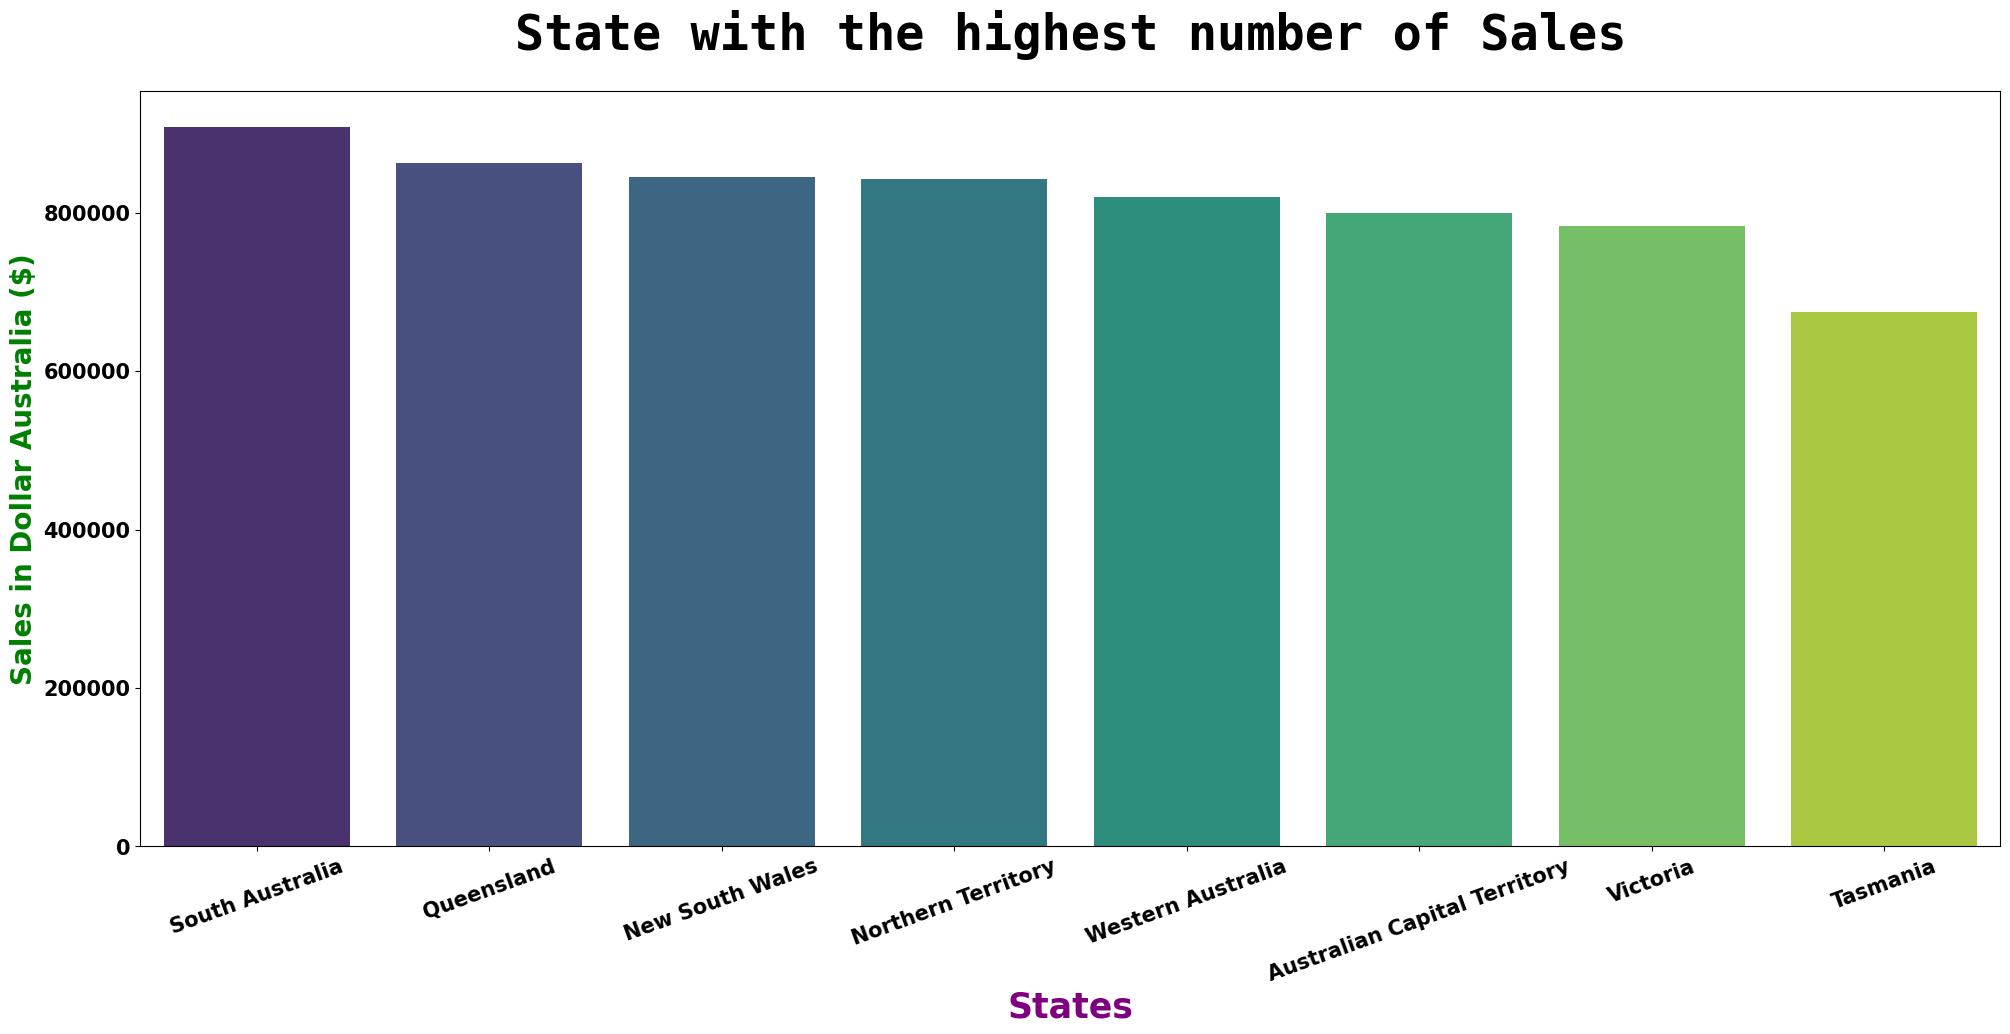

In [ ]:
#Group Area in State
high_state_sales = (cop_data.groupby("state") # groupping
                           .sum() # sum
                           .astype("int")["sales"] # change type into int and get the sales features 
                           .sort_values(ascending=False) # sort the values 
                           .to_frame()) # change it into data frame
# let's plot it
plt.figure(dpi=100, figsize=(24, 10)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=high_state_sales.index, # x-axis
    y="sales", # y-axis
    data=high_state_sales, # data
    palette="viridis" # palette (like cmap)
)
# title
plt.title( # title
    "State with the highest number of Sales", 
    fontname="monospace", # font-name 
    weight="bold", # weight
    fontsize=35, # the size of font 
    pad=30 # padding
)
# x-label
plt.xlabel( # x-label
    "States", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # fontsiz
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=20 # rotate
) 
plt.ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    weight="bold", # weight
    color="g", # color
    fontsize=20, # font-size
)
plt.yticks(  # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

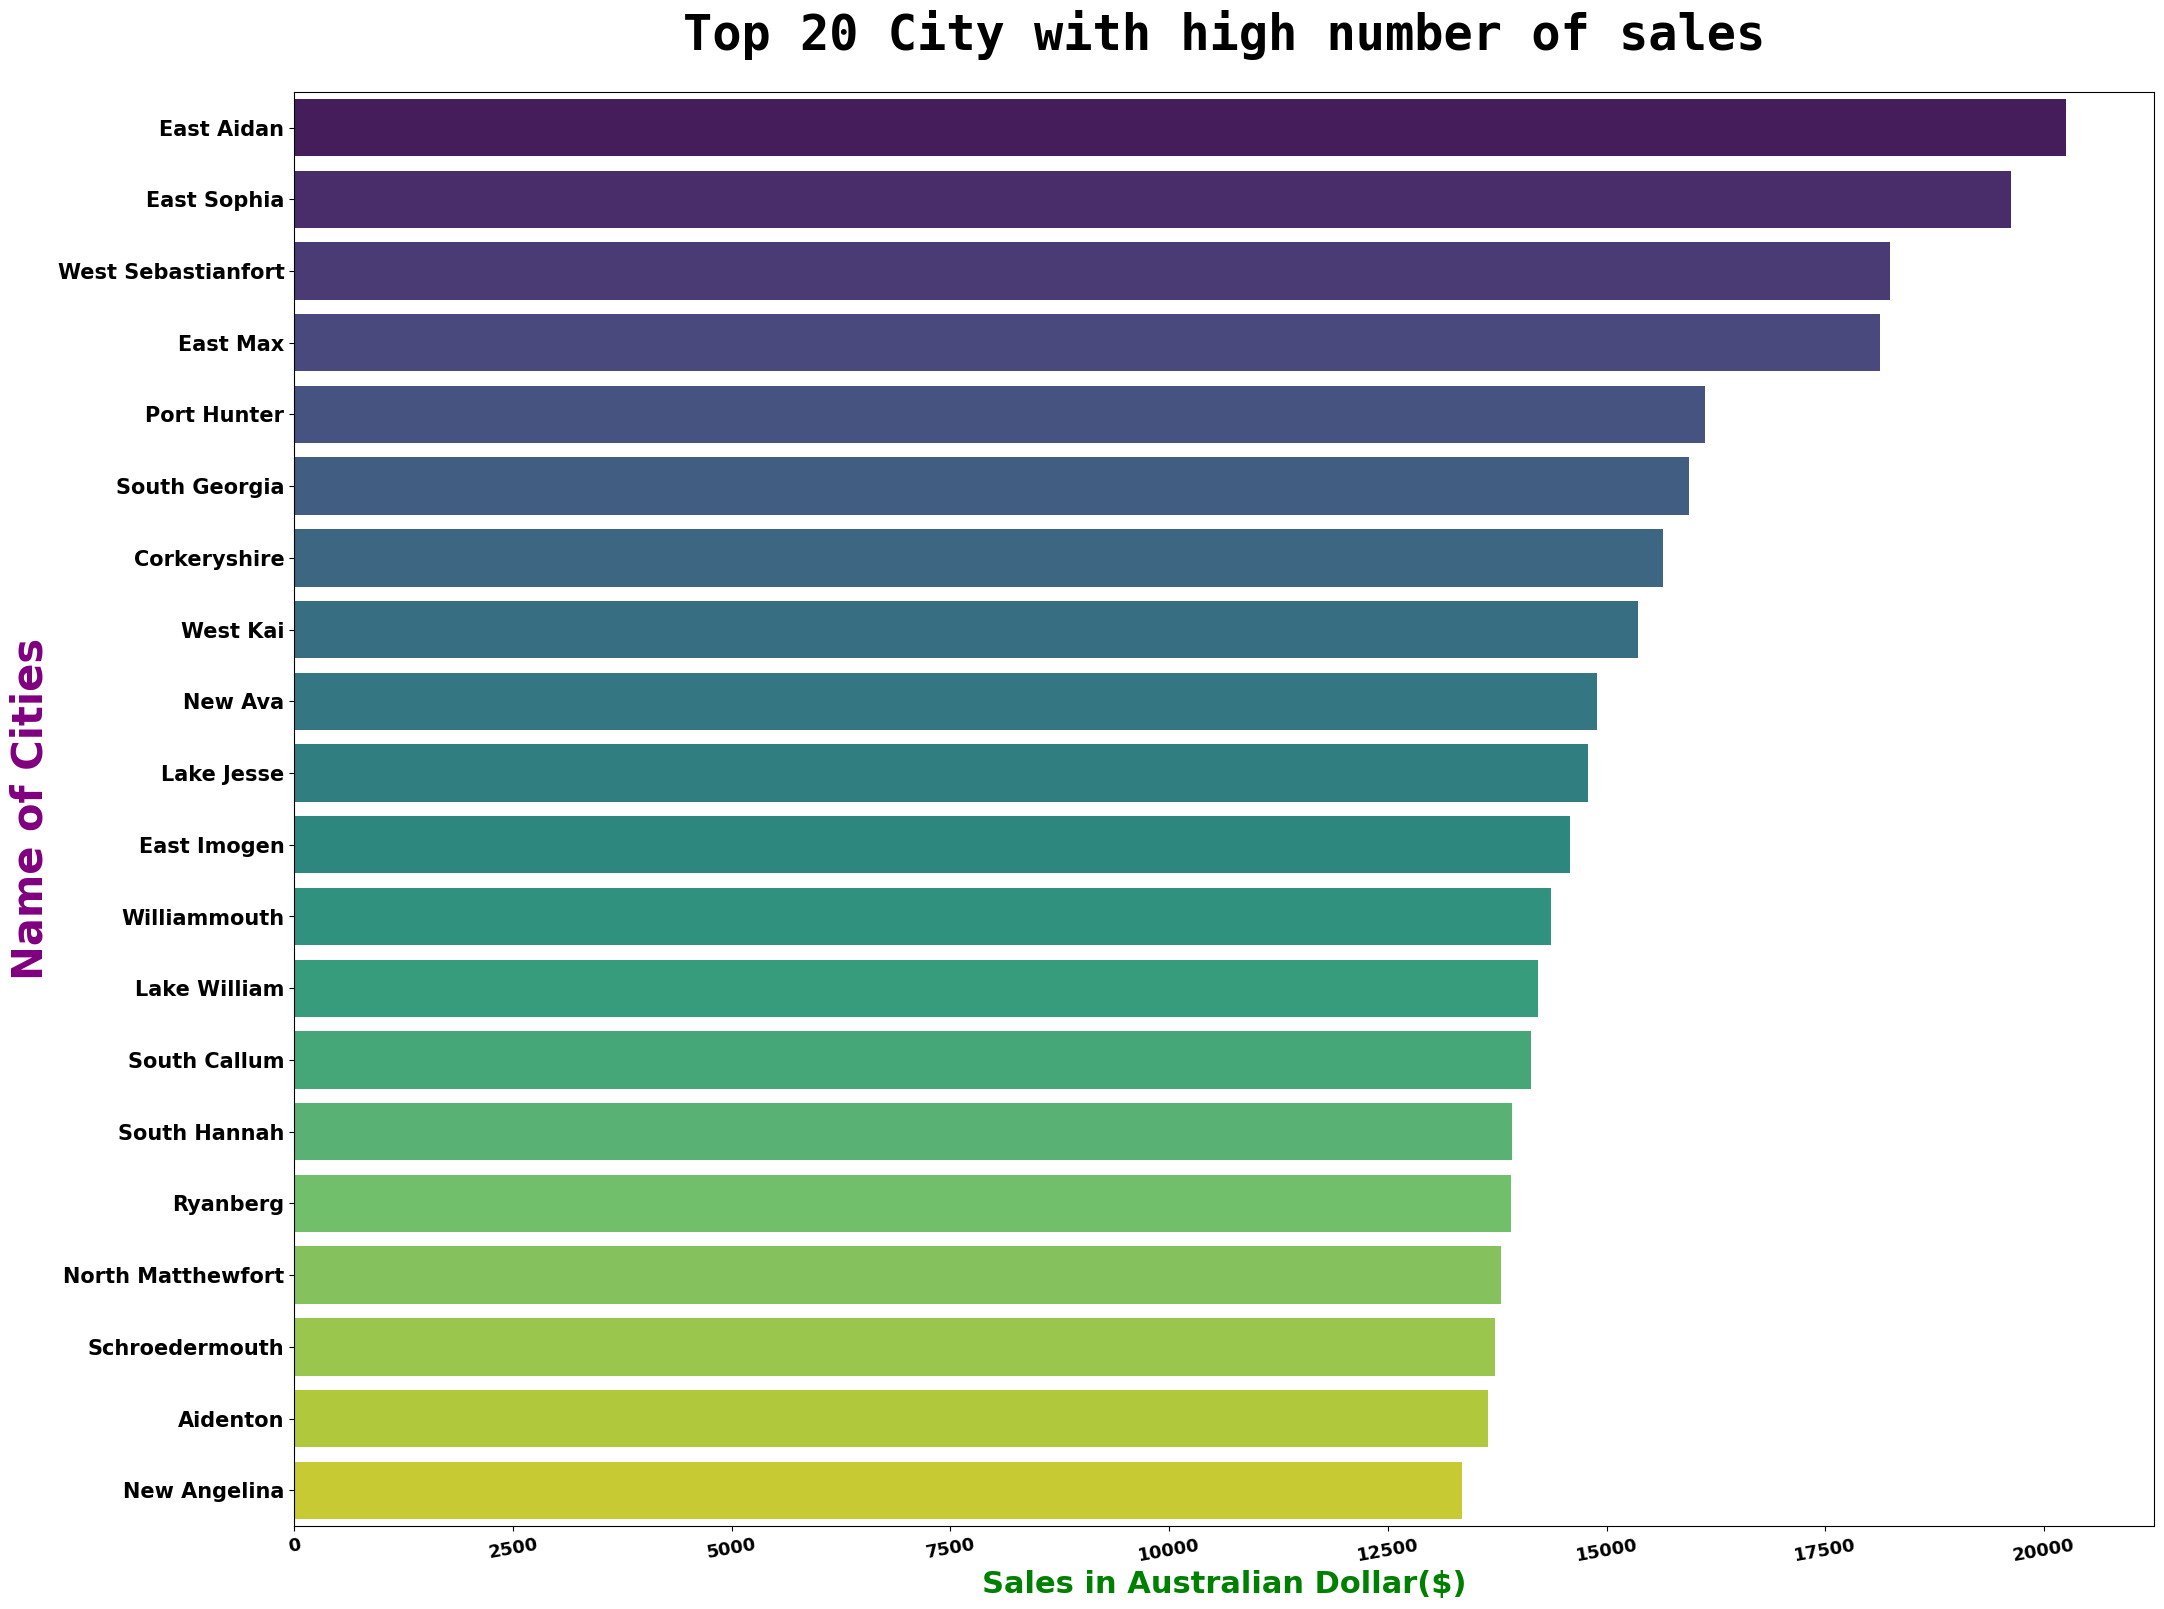

In [ ]:
# group of the highest number of sales in city
top_20_city = (cop_data.groupby("city") # groupping
                      .sum() # sum
                      .astype("int")["sales"] # change type into int and get the sales features
                      .sort_values(ascending=False) # sort values
                      .head(20) # head
                      .to_frame()) # change it into data frame
# let's plot it
plt.figure(dpi=100, figsize=(24, 19)) # figuring the size
sns.barplot( # barplot
    x="sales", # x-axis
    y=top_20_city.index, # y-axis 
    data=top_20_city, # data
    palette="viridis" # palette (colormap)
)
plt.title( # title
    "Top 20 City with high number of sales", 
    fontname="monospace",  # font-name
    weight="bold",  # weight
    fontsize=35, # size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Sales in Australian Dollar($)", 
    weight="bold", # weight
    color="g", # color
    fontsize=22, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=13, # font-size
    rotation=10 # rotation
) 
plt.ylabel( # y-label
    "Name of Cities", 
    weight="bold", # weight
    color="purple", # color
    fontsize=30, # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

by looking at Top 20 City With The Higher Number of Sales, We can see that East Aidan is the number one with number of sales 20247. Followed with East Sophia with 19628 sales, then West Sebastianfort, and East Max which almost equal around 18100 - 182500.

In [ ]:
print(top_20_city)

                    sales
city                     
East Aidan          20247
East Sophia         19628
West Sebastianfort  18240
East Max            18127
Port Hunter         16128
South Georgia       15945
Corkeryshire        15641
West Kai            15356
New Ava             14891
Lake Jesse          14791
East Imogen         14583
Williammouth        14370
Lake William        14216
South Callum        14136
South Hannah        13924
Ryanberg            13905
North Matthewfort   13796
Schroedermouth      13720
Aidenton            13644
New Angelina        13349
